<a href="https://colab.research.google.com/github/esa-prakasa/autov/blob/master/binary_lane_2_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load dan mount Google Drive
from google.colab import drive

# Pilihan user authorization dengan menggunakan account Google
drive.mount('/content/drive')

# Pilihan user authorization dengan menggunakan account Google

path = "/content/drive/My Drive/Colab Notebooks/dataset"
!ls -l "/content/drive/My Drive/Colab Notebooks/dataset"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
total 103421
-rw------- 1 root root      168 Feb  7 04:37  abc.csv
-rw------- 1 root root    46323 Feb 11 07:41  b15.jpg
drwx------ 2 root root     4096 Apr 17 08:30  csvfiles
-rw------- 1 root root   310090 Feb  7 04:18  juanda.jpg
-rw------- 1 root root  3780462 Feb  7 09:53  juantestbw.bmp
-rw------- 1 root root   993426 Feb  7 09:51  juantest.jpg
-rw------- 1 root root  2458120 Feb 11 07:41  keras_model.h5
drwx------ 2 root root     4096 Apr 18 06:27  kitt

In [0]:
import numpy as np
import cv2
import datetime

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/csvfiles/test_road20pct_210.csv")

dataset.head(10)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,No,i,j,r,g,b,class
0,210,0,0,11,8,11,0
1,210,0,1,10,9,10,0
2,210,0,2,8,9,9,0
3,210,0,3,8,8,9,0
4,210,0,4,8,10,11,0
5,210,0,5,9,8,10,0
6,210,0,6,9,8,9,0
7,210,0,7,9,10,10,0
8,210,0,8,11,9,13,0
9,210,0,9,10,10,10,0


In [0]:
X= dataset.iloc[:,1:6]
Y= dataset.iloc[:,6]

#print("rows of X0 :"+str(len(X)))
#print("cols of X0 :"+str(len(X[0])))



print("Input")
print(X)
type(X)

#print("Target")
#print(Y)

#dataset.head(5)




Input
       i    j    r    g    b
0      0    0   11    8   11
1      0    1   10    9   10
2      0    2    8    9    9
3      0    3    8    8    9
4      0    4    8   10   11
...   ..  ...  ...  ...  ...
9419  37  243  134  117  117
9420  37  244  161  145  139
9421  37  245  153  184  184
9422  37  246  124  108  111
9423  37  247  120  111  116

[9424 rows x 5 columns]


pandas.core.frame.DataFrame

In [0]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X
type(X)

numpy.ndarray

In [0]:
X_test = X
Y_test = Y

path = "/content/drive/My Drive/Colab Notebooks/dataset/"
print(path)
len(Y_test)

/content/drive/My Drive/Colab Notebooks/dataset/


9424

In [0]:
from keras.models import model_from_json


# load json and create model
json_file = open((path+'road_model_20pct200.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path+"road_wg_model_20pct200.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 79.27%


In [0]:
result = loaded_model.predict(X_test)
finClass = np.round(result)

c3 = [result, finClass]

#print(result[110:130])
#print(finClass[110:130])



In [0]:
import datetime
path = "/content/drive/My Drive/Colab Notebooks/dataset/csvfiles/"

now = datetime.datetime.now()
#fileName = now.strftime("%Y%m%d%H%M%S")
fileName = now.strftime("_test")

fileName = 'result_roadFriday'+fileName+'.csv'

file1 = open((path+fileName),"w") 

dataItem = ("i j red green blue class comp")
file1.write(dataItem+"\n")


Nx = len(X)

print(Nx)

seg = np.zeros((Nx,6), dtype=int)

#print(dataset.iloc[1:10,0])


#for i in range(int(0.993*Nx),Nx):

for i in range(Nx):
  seg[i,0] = dataset.iat[i, 1]
  seg[i,1] = dataset.iat[i, 2]
  seg[i,2] = dataset.iat[i, 3]
  seg[i,3] = dataset.iat[i, 4]
  seg[i,4] = dataset.iat[i, 5]
  seg[i,5] = finClass[i,0] 
  dataItem = (str(seg[i,0])+' '+str(seg[i,1])+' '+str(seg[i,2])+' '+str(seg[i,3])+' '+str(seg[i,4])+' '+str(seg[i,5]))
  file1.write(dataItem+"\n")
  #print(dataItem)


file1.close() #to change file access modes 



9424


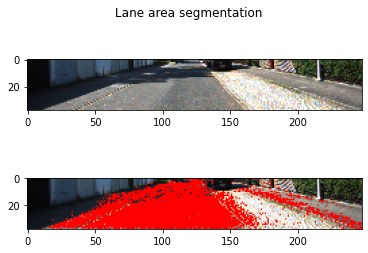

In [0]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(path+"tgt_uu_000097.png")
img2 = img.copy()

for i in range(Nx):
  ii = seg[i,0]
  jj = seg[i,1]
  clsIdx = seg[i,5]
  if (clsIdx == 1):
    img2[ii,jj,0] = 0 
    img2[ii,jj,1] = 0 
    img2[ii,jj,2] = 255 

b,g,r =  cv2.split(img)
imgRGB = cv2.merge([r,g,b])

b,g,r =  cv2.split(img2)
img2RGB = cv2.merge([r,g,b])



fig, axs = plt.subplots(2,1)
fig.suptitle("Lane area segmentation")
axs[0].imshow(imgRGB)
axs[1].imshow(img2RGB)
plt.show()
